In [18]:
import pandas as pd
import numpy as np

In [19]:
dataset = pd.read_csv('winequality-red.csv', sep=',')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
x = np.asarray(dataset.drop(['quality'],axis = 1),dtype=np.float64)
y = np.asarray(dataset['quality'],dtype=np.int64)
print(x[:5], y[:5])

[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]] [5 5 5 6 5]


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
print(x_train.shape)
print(x_test.shape)

(1199, 11)
(400, 11)


In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

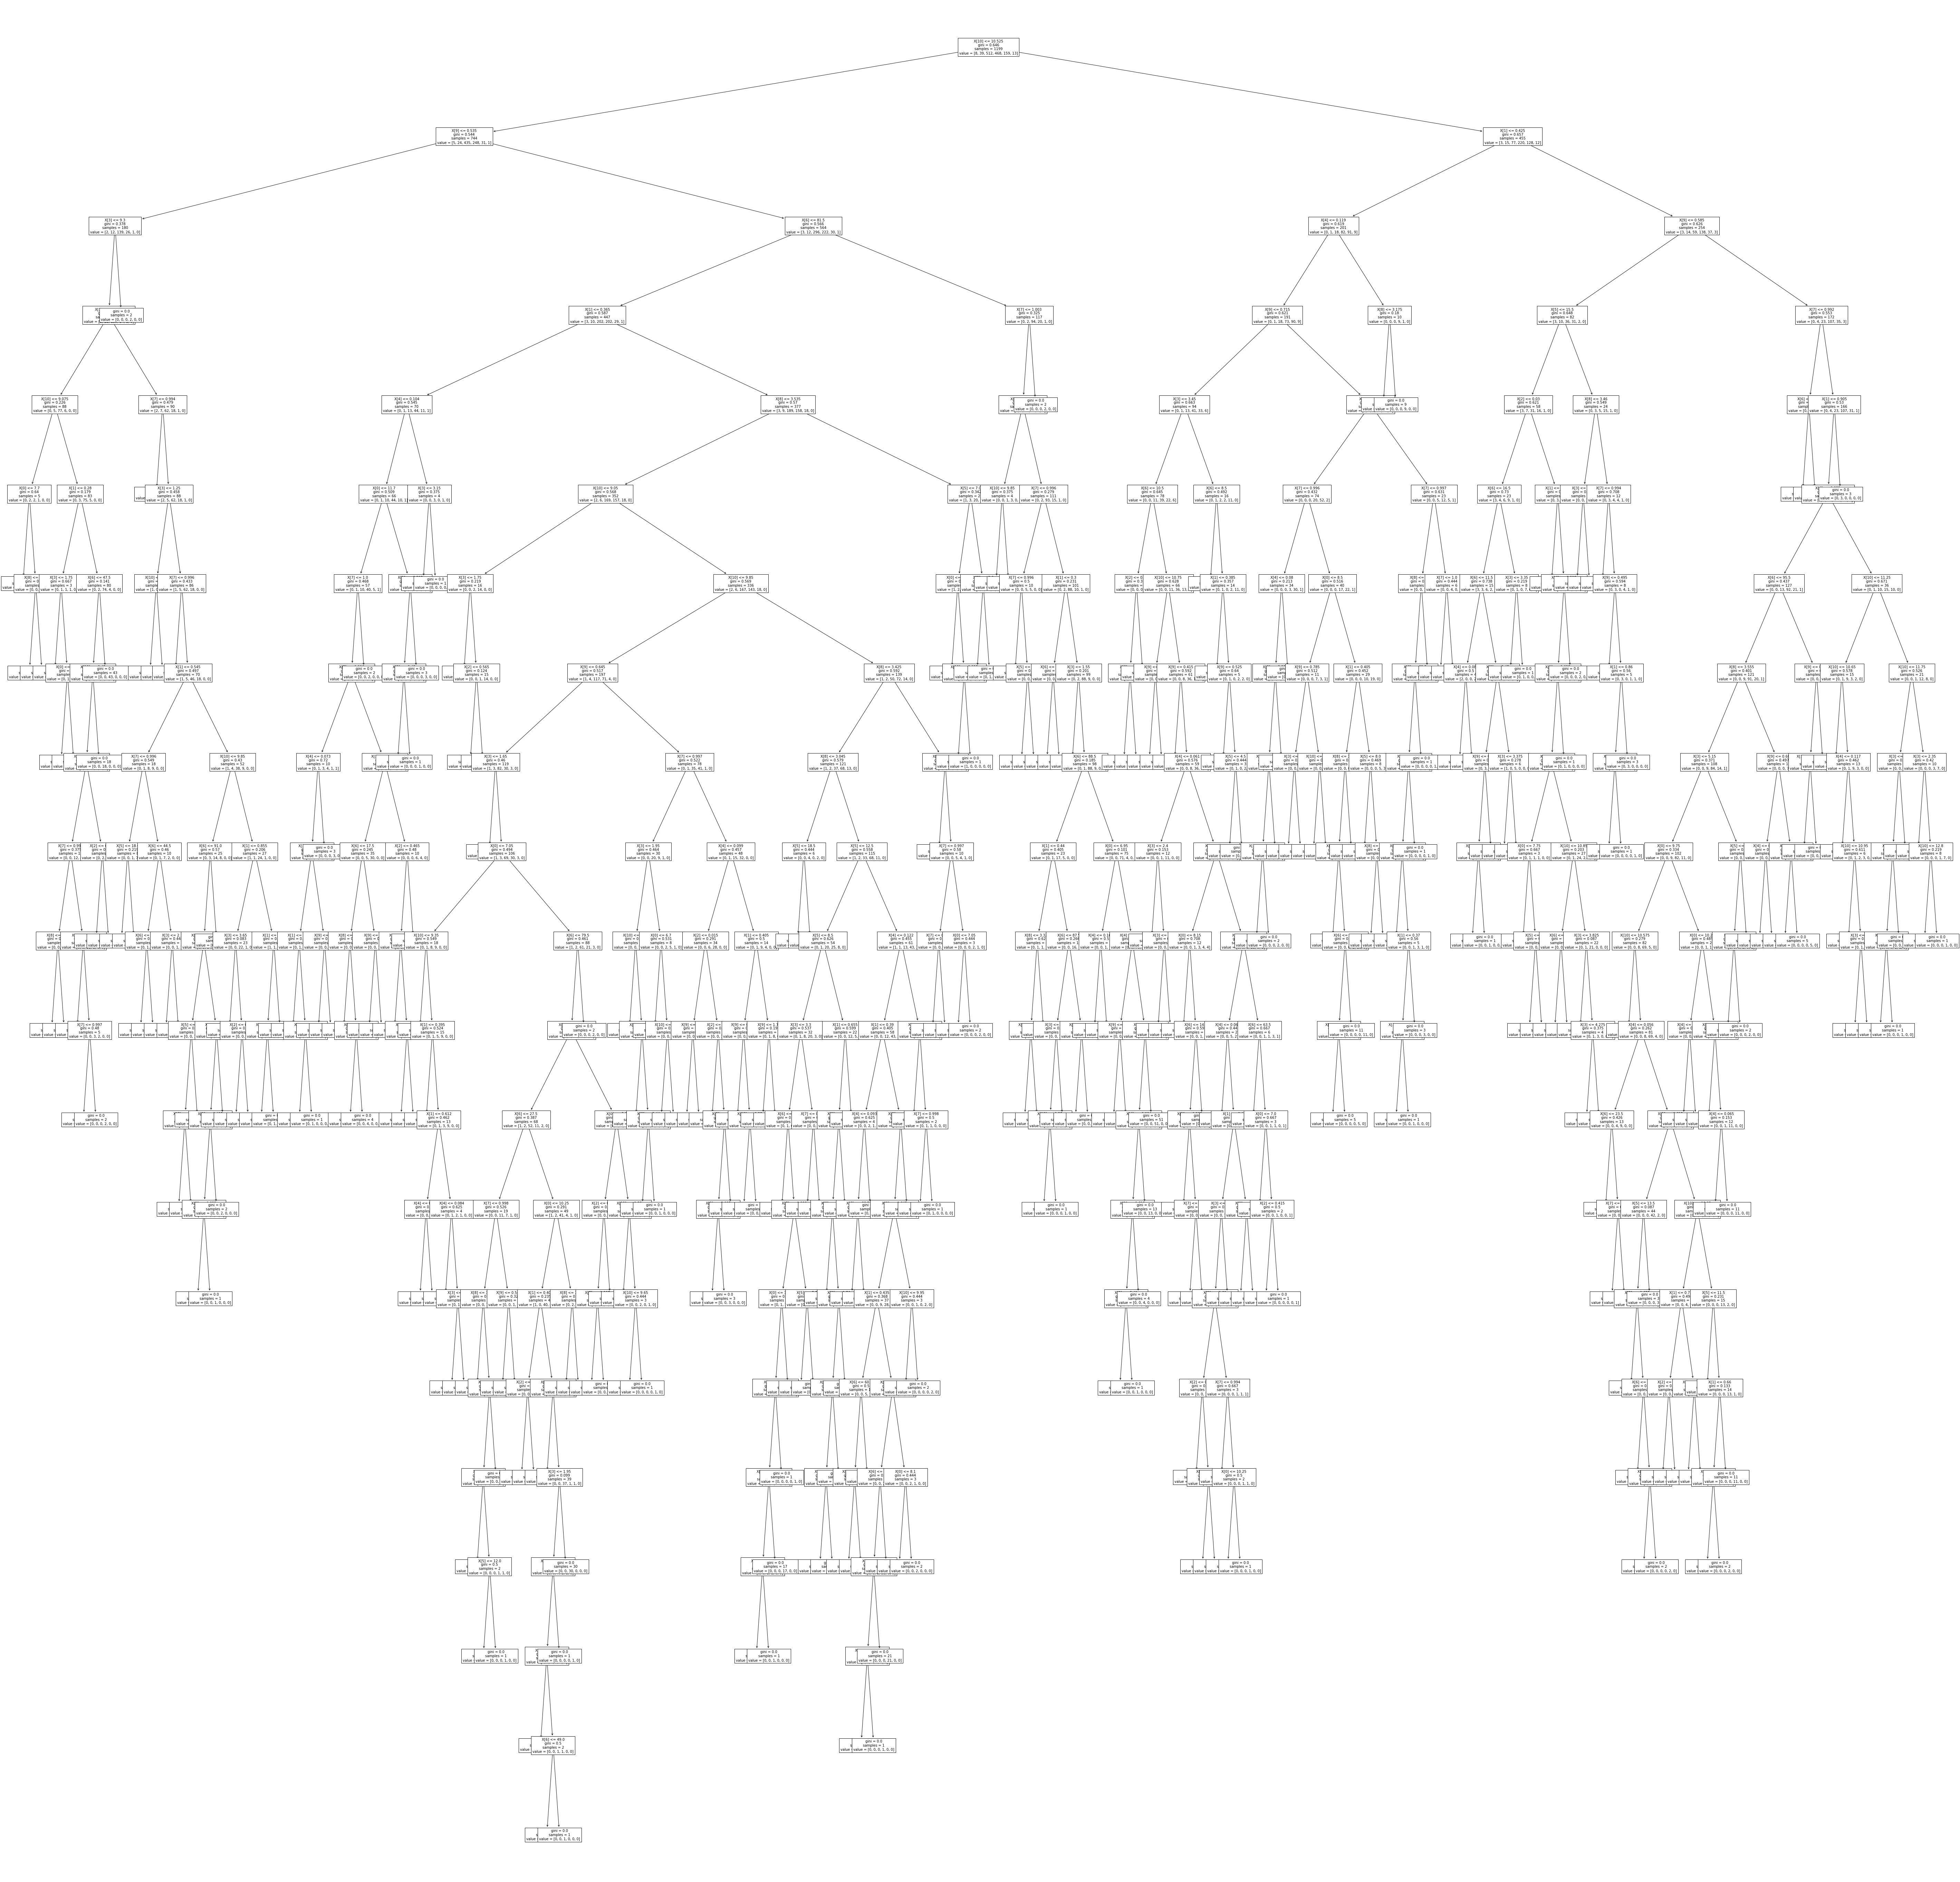

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(100, 100))
tree.plot_tree(model, fontsize=10)
plt.show

In [25]:
wine = np.array([[6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0]])
print(model.predict(wine))

[7]


In [26]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.635

In [27]:
print(x_test[:5])
print(y_pred)
print(y_test)

[[1.0800e+01 4.7000e-01 4.3000e-01 2.1000e+00 1.7100e-01 2.7000e+01
  6.6000e+01 9.9820e-01 3.1700e+00 7.6000e-01 1.0800e+01]
 [8.1000e+00 8.2000e-01 0.0000e+00 4.1000e+00 9.5000e-02 5.0000e+00
  1.4000e+01 9.9854e-01 3.3600e+00 5.3000e-01 9.6000e+00]
 [9.1000e+00 2.9000e-01 3.3000e-01 2.0500e+00 6.3000e-02 1.3000e+01
  2.7000e+01 9.9516e-01 3.2600e+00 8.4000e-01 1.1700e+01]
 [1.0200e+01 6.4500e-01 3.6000e-01 1.8000e+00 5.3000e-02 5.0000e+00
  1.4000e+01 9.9820e-01 3.1700e+00 4.2000e-01 1.0000e+01]
 [1.2200e+01 4.5000e-01 4.9000e-01 1.4000e+00 7.5000e-02 3.0000e+00
  6.0000e+00 9.9690e-01 3.1300e+00 6.3000e-01 1.0400e+01]]
[6 5 7 5 5 6 6 6 5 5 4 5 6 4 6 5 7 5 5 4 6 6 6 7 5 5 5 7 5 8 7 7 7 6 7 7 5
 6 5 4 5 5 6 7 6 5 5 6 5 8 5 6 6 6 6 5 5 5 7 5 5 5 6 7 5 6 5 5 6 6 5 5 5 5
 6 6 5 5 5 7 6 6 6 6 6 5 6 5 5 5 5 6 7 5 7 5 6 4 5 5 7 7 5 6 5 5 5 6 6 5 6
 5 8 5 6 6 6 4 6 6 5 7 5 5 5 7 5 6 7 6 6 6 6 6 6 5 6 5 6 5 6 5 5 6 5 6 8 6
 5 5 6 7 6 6 6 6 5 6 6 6 5 7 6 5 5 5 6 6 6 6 6 5 4 7 3 6 7 7 7 5 5 7 